<a href="https://colab.research.google.com/github/SeohyunLyoo/handson-ml3/blob/main/10_02_%EC%9D%B8%EA%B3%B5_%EC%8B%A0%EA%B2%BD%EB%A7%9D_(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [3]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ann"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [4]:
data = keras.datasets.fashion_mnist.load_data()

In [5]:
(X_train_full, y_train_full), (X_test, y_test) = data
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_val, y_val = X_train_full[-5000:], y_train_full[-5000:]

In [6]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('uint8'))

In [7]:
X_train, X_val, X_test = X_train / 255., X_val / 255., X_test / 255.

In [8]:
X_train.shape, X_train.dtype

((55000, 28, 28), dtype('float64'))

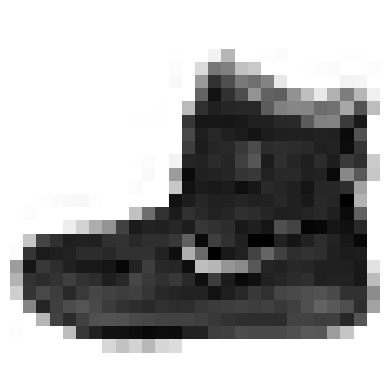

In [9]:
plt.imshow(X_train[0], cmap='binary')
plt.axis('off')
plt.show()

In [10]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [11]:
class_names[y_train[0]], y_train[0]

('Ankle boot', 9)

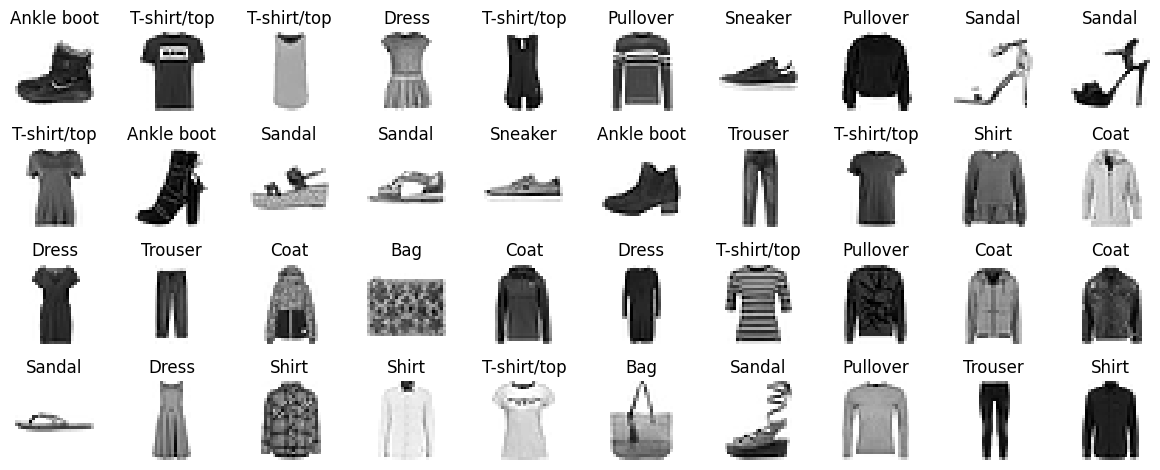

In [12]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]])
plt.subplots_adjust(wspace=0.2, hspace=0.5)

save_fig("fashion_mnist_plot")
plt.show()

In [13]:
tf.random.set_seed(42)
model = keras.Sequential()

model.add(keras.layers.Input(shape=[28,28]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [14]:
tf.random.set_seed(42)
model = keras.Sequential(
    [
        keras.layers.Input(shape=[28,28]),
        keras.layers.Flatten(),
        keras.layers.Dense(300, activation='relu'),
        keras.layers.Dense(100, activation='relu'),
        keras.layers.Dense(10, activation='softmax')
    ]
)

In [15]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 300)                 │         235,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 100)                 │          30,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 10)                  │           1,010 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.layers

[<Flatten name=flatten_1, built=True>,
 <Dense name=dense_3, built=True>,
 <Dense name=dense_4, built=True>,
 <Dense name=dense_5, built=True>]

In [17]:
hidden1 = model.layers[1]
hidden1.name

'dense_3'

In [18]:
weights, biases = hidden1.get_weights()
weights

array([[-0.03665726,  0.00719102, -0.03255283, ..., -0.06657408,
        -0.02022457, -0.07052044],
       [ 0.02606273,  0.05607945, -0.02159353, ...,  0.05813622,
         0.01000734,  0.01544595],
       [ 0.01220941, -0.04738944,  0.01546036, ..., -0.03036691,
         0.06943153,  0.06532204],
       ...,
       [ 0.00821295,  0.03070376,  0.07066341, ...,  0.03155304,
        -0.04898486, -0.06431311],
       [-0.01632693,  0.00207118, -0.02707985, ..., -0.06641638,
        -0.04766807,  0.05902274],
       [ 0.04035851, -0.06189927,  0.06515135, ..., -0.05178671,
         0.04114322,  0.00333892]], dtype=float32)

In [19]:
weights.shape

(784, 300)

In [20]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [21]:
biases.shape

(300,)

In [22]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_val, y_val))

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6973 - loss: 0.9575 - val_accuracy: 0.8278 - val_loss: 0.5027
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8277 - loss: 0.5020 - val_accuracy: 0.8386 - val_loss: 0.4523
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.8432 - loss: 0.4498 - val_accuracy: 0.8468 - val_loss: 0.4269
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8536 - loss: 0.4198 - val_accuracy: 0.8532 - val_loss: 0.4121
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.8609 - loss: 0.3979 - val_accuracy: 0.8554 - val_loss: 0.4013
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.8667 - loss: 0.3807 - val_accuracy: 0.8580 - val_loss: 0.3943
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.8711 - loss: 0.3661 - val_accuracy: 0.8566 - val_loss: 0.3869
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8742 - loss: 0.3537 - 

In [23]:
history.history['loss']

[0.6970057487487793,
 0.4828339219093323,
 0.4385488033294678,
 0.4112367331981659,
 0.3908470571041107,
 0.3745114803314209,
 0.36059698462486267,
 0.34885069727897644,
 0.3384738266468048,
 0.32914137840270996,
 0.3205280601978302,
 0.3127201497554779,
 0.30551138520240784,
 0.298556923866272,
 0.2919711172580719,
 0.28585085272789,
 0.2801220118999481,
 0.2744424343109131,
 0.26902446150779724,
 0.26390671730041504,
 0.258877158164978,
 0.25412386655807495,
 0.24938467144966125,
 0.2450239658355713,
 0.240617573261261,
 0.2363179624080658,
 0.23214291036128998,
 0.22816666960716248,
 0.2240728884935379,
 0.2202109545469284]

<Axes: xlabel='Epoch'>

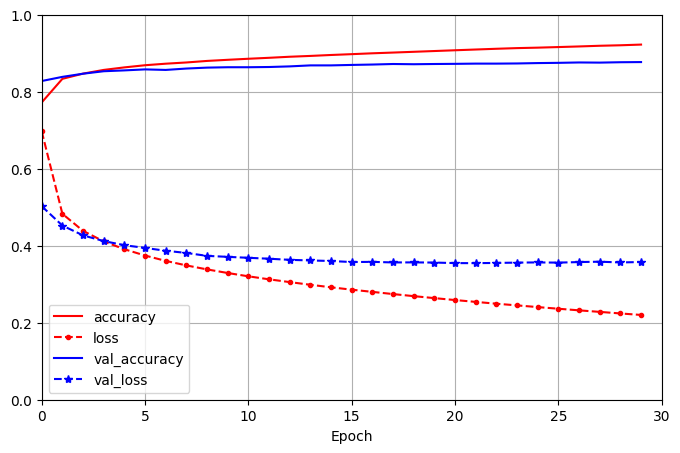

In [24]:
pd.DataFrame(history.history).plot(
    figsize=(8,5), xlim=[0,30], ylim=[0,1], grid=True, xlabel='Epoch', style=['r-', 'r--.', 'b-', 'b--*']
)

In [25]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8708 - loss: 0.3761


[0.37455475330352783, 0.871399998664856]

In [26]:
X_new = X_test[:3]
y_proba = model.predict([X_new])
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.  , 0.02, 0.  , 0.76],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [27]:
y_pred = y_proba.argmax(axis=1)
y_pred

array([9, 2, 1])

In [28]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [29]:
data1 = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(data1.data, data1.target, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, random_state=42)

In [30]:
X_train.shape, X_train[0], y_train.shape, y_train[0], X_train.shape[1:]

((11610, 8),
 array([ 3.52140000e+00,  1.50000000e+01,  3.04994451e+00,  1.10654828e+00,
         1.44700000e+03,  1.60599334e+00,  3.76300000e+01, -1.22430000e+02]),
 (11610,),
 1.442,
 (8,))

In [31]:
tf.random.set_seed(42)

norm_layer = keras.layers.Normalization(input_shape=X_train.shape[1:])
optimizer = keras.optimizers.Adam(learning_rate=1e-3)

model2 = keras.Sequential(
    [
        norm_layer,
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(50, activation='relu'),
        keras.layers.Dense(1)
    ]
)

model2.compile(optimizer=optimizer, loss='mse', metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
hisory2 = model2.fit(X_train, y_train, epochs=20, validation_data=(X_test, y_test))

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


363/363 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - RootMeanSquaredError: 1.2555 - loss: 1.7060 - val_RootMeanSquaredError: 0.6208 - val_loss: 0.3854
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6332 - loss: 0.4014 - val_RootMeanSquaredError: 0.5993 - val_loss: 0.3591
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6096 - loss: 0.3719 - val_RootMeanSquaredError: 0.5855 - val_loss: 0.3429
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5988 - loss: 0.3587 - val_RootMeanSquaredError: 0.5846 - val_loss: 0.3417
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5912 - loss: 0.3496 - val_RootMeanSquaredError: 0.5879 - val_loss: 0.3456
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5816 - loss: 0.3384 - val_RootMeanSquaredError: 0.5770 - val_loss: 0.3329
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.5799 - loss: 0.3365 -

In [32]:
model2.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ normalization (Normalization)        │ (None, 8)                   │              17 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 50)                  │             450 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 50)                  │           2,550 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 16,822 (65.72 KB)

 Trainable params: 5,601 (21.88 KB)

 Non-trainable params: 17 (72.00 B)

 Optimizer params: 11,204 (43.77 KB)

In [33]:
mse_test, rmse_test = model2.evaluate(X_test, y_test)

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - RootMeanSquaredError: 0.5392 - loss: 0.2908


In [34]:
mse_test, rmse_test

(0.2970944046974182, 0.5450636744499207)

In [35]:
X_new = X_test[:3]
y_pred = model2.predict(X_new)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step


array([[0.4496771],
       [1.1754935],
       [4.966771 ]], dtype=float32)

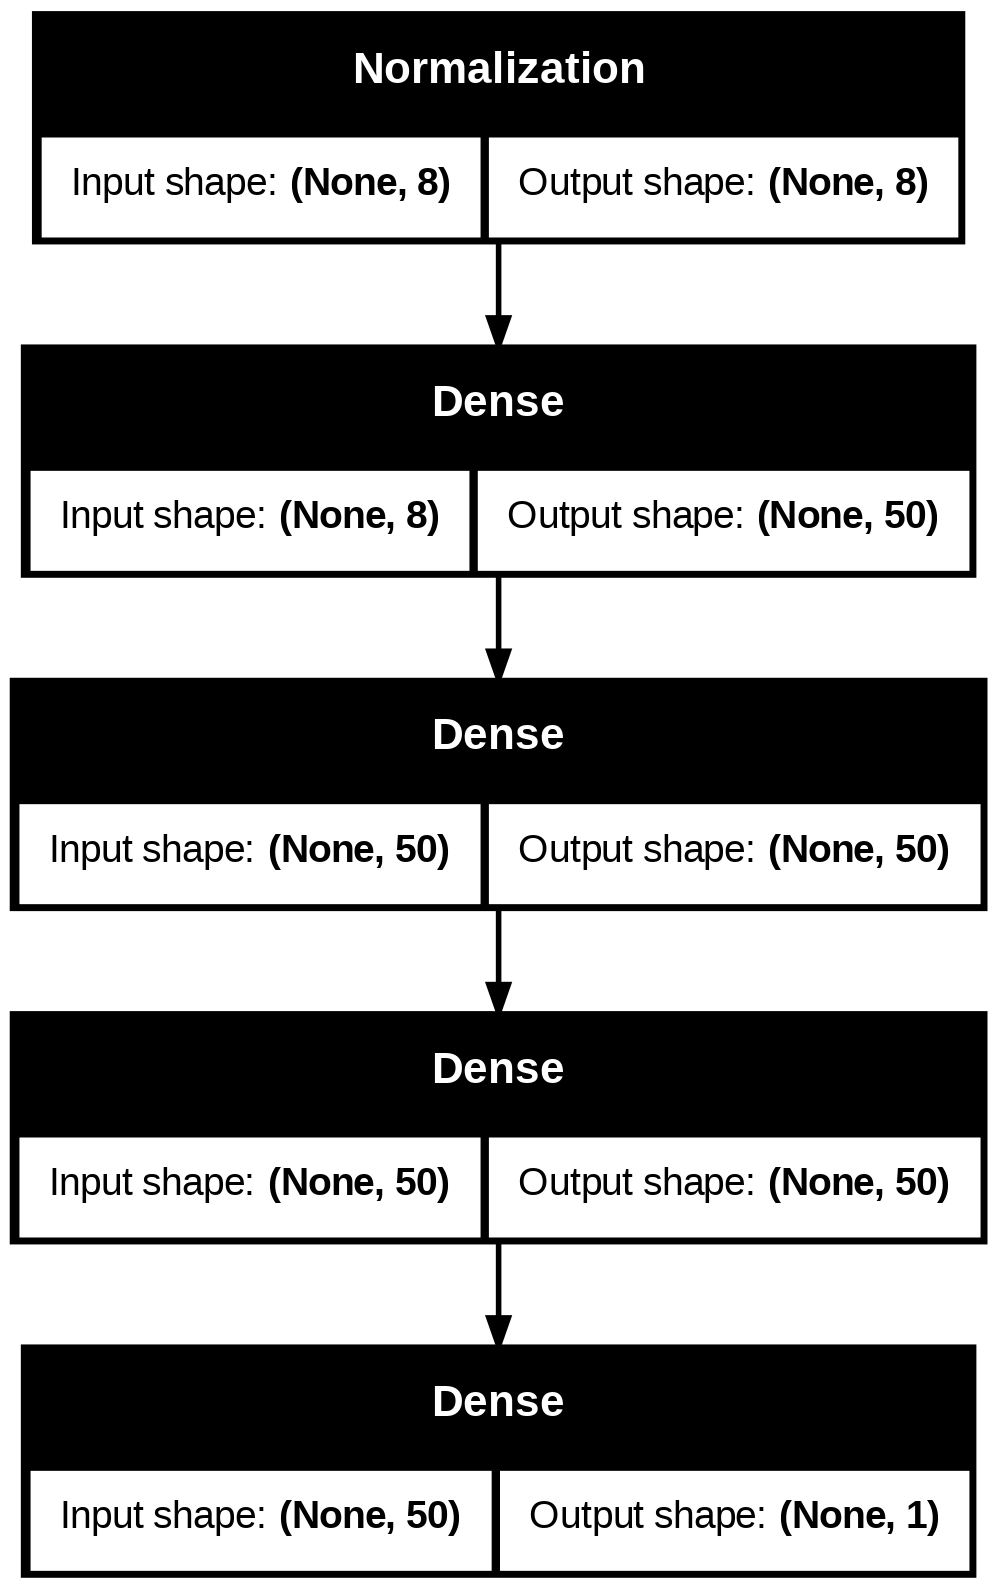

In [36]:
tf.keras.utils.plot_model(model2, "housing_model.png", show_shapes=True)

In [37]:
tf.random.set_seed(42)

normalization_layer = tf.keras.layers.Normalization()
hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
concat_layer = tf.keras.layers.Concatenate()
output_layer = tf.keras.layers.Dense(1)

input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = hidden_layer1(normalized)
hidden2 = hidden_layer2(hidden1)
concat = concat_layer([normalized, hidden2])
output = output_layer(concat)

model3 = tf.keras.Model(inputs=[input_], outputs=[output])

In [38]:
model3.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 8)              │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ normalization_1           │ (None, 8)              │             17 │ input_layer_3[0][0]    │
│ (Normalization)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_10 (Dense)          │ (None, 30)             │            270 │ normalization_1[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_11 (Dense)          │ (None, 30)             │            930 │ dense_10[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ concatenate (Concatenate) │ (None, 38)             │              0 │ normalization_1[0][0], │
│                           │                        │                │ dense_11[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_12 (Dense)          │ (None, 1)              │             39 │ concatenate[0][0]      │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 1,256 (4.91 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 17 (72.00 B)

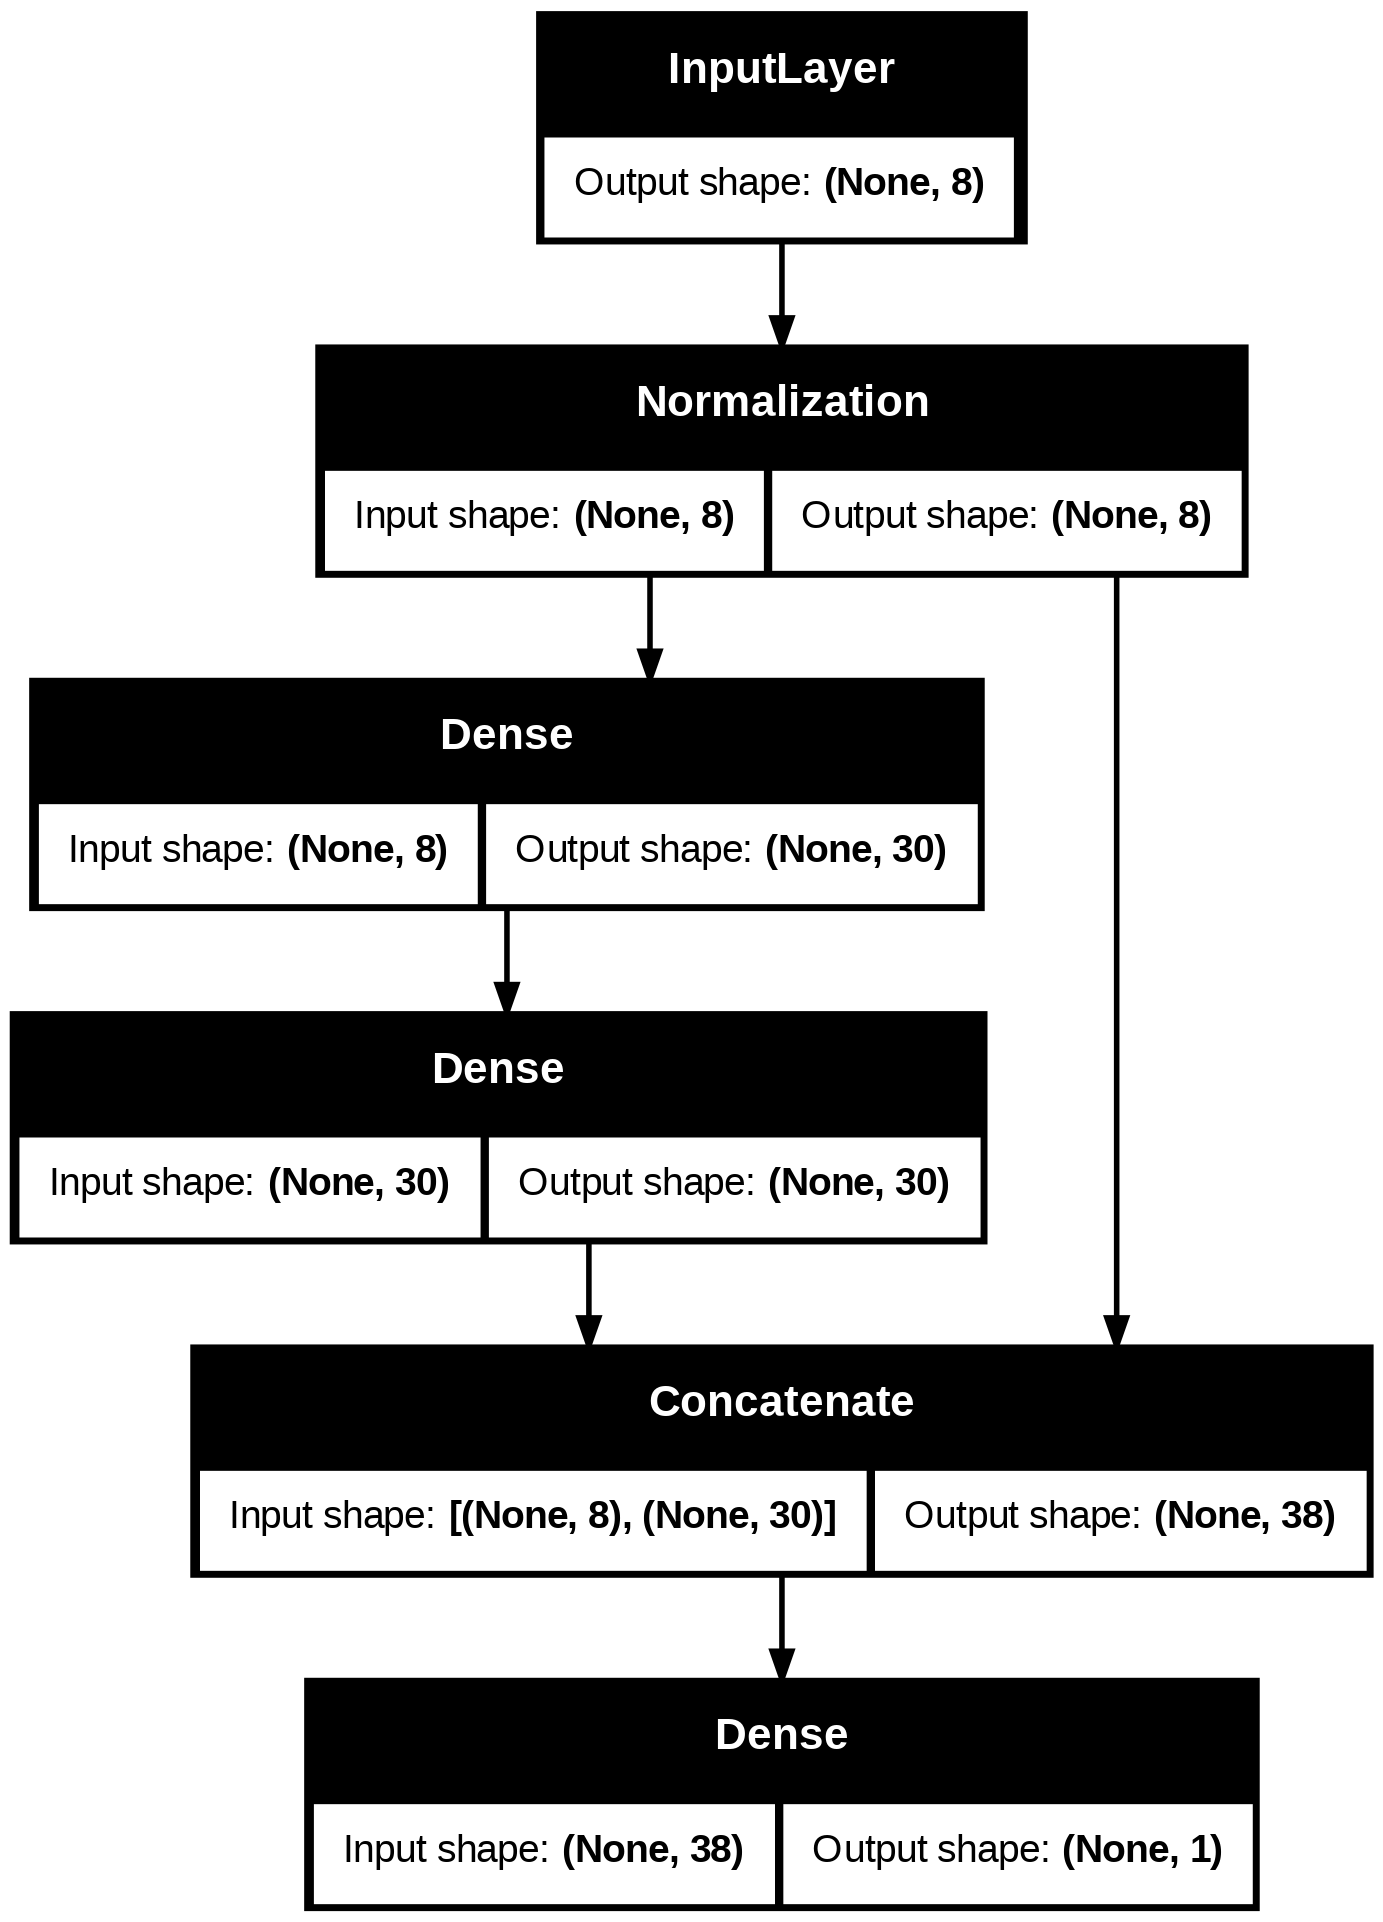

In [39]:
tf.keras.utils.plot_model(model3, show_shapes=True)

In [40]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model3.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])
normalization_layer.adapt(X_train)
history = model3.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - RootMeanSquaredError: 1.3848 - loss: 2.0499 - val_RootMeanSquaredError: 1.1922 - val_loss: 1.4213
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.7090 - loss: 0.5038 - val_RootMeanSquaredError: 1.4015 - val_loss: 1.9641
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6514 - loss: 0.4246 - val_RootMeanSquaredError: 1.8492 - val_loss: 3.4196
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6308 - loss: 0.3981 - val_RootMeanSquaredError: 1.8709 - val_loss: 3.5002
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6209 - loss: 0.3857 - val_RootMeanSquaredError: 1.9142 - val_loss: 3.6643
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6125 - loss: 0.3753 - val_RootMeanSquaredError: 1.9507 - val_loss: 3.8052
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - RootMeanSquaredError: 0.6078 - los

In [41]:
mse_test3, rmse_test3 = model3.evaluate(X_test, y_test)
mse_test3, rmse_test3

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - RootMeanSquaredError: 0.5677 - loss: 0.3225


(0.3211330771446228, 0.5666860342025757)

In [42]:
X_new3 = X_test[:3]
y_pred3 = model3.predict(X_new3)
y_pred3

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


array([[0.51113045],
       [1.4511621 ],
       [4.4666142 ]], dtype=float32)

In [45]:
y_pred3_classes = np.argmax(y_pred3, axis=1)
np.array(class_names)[y_pred3_classes]

array(['T-shirt/top', 'T-shirt/top', 'T-shirt/top'], dtype='<U11')